<a href="https://colab.research.google.com/github/KshitijMayank/UnsupervisedLearning_Image/blob/master/Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means, Hierarchical and GMM Clustering

## Creating the feature vector and normalizing it

In [0]:
# For plots and figures
from matplotlib import image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# for matrix manipulations
import numpy as np
import pandas as pd 

# For scaling
from sklearn.preprocessing import MinMaxScaler

# for Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering



In [0]:
images =[]
images.append(image.imread('3096_colorPlane.jpg'))
images.append(image.imread('42049_colorBird.jpg'))

# Check the dimensions of the image
print('Image Plane: {} and Image Bird: {} '.format(images[0].shape,images[1].shape))

Image Plane: (321, 481, 3) and Image Bird: (321, 481, 3) 


In [0]:
## Creating a feture matrix 
# - By verticaly arranging the data as a DataFrame
# - Adding the vertical and horizontal values over the data frame
data_plane = images[0]
size_plane=(data_plane.shape[0],data_plane.shape[1])
array_transformed_plane = np.moveaxis(np.indices(size_plane),0,2)
array_final_transformed_plane = np.dstack((array_transformed_plane, data_plane)).reshape((-1,5))

data_bird = images[1]
size_bird=(data_bird.shape[0],data_bird.shape[1])
array_transformed = np.moveaxis(np.indices(size_bird),0,2)
array_final_transformed_bird = np.dstack((array_transformed, data_bird)).reshape((-1,5))

image_matrix_plane = pd.DataFrame(array_final_transformed_plane, columns=["v","h","r_val","g_val","b_val"])
print('Plane Matrix: \n',image_matrix_plane.head(),'\n \n \n ...',image_matrix_plane.tail())

image_matrix_bird = pd.DataFrame(array_final_transformed_bird, columns=["v","h","r_val","g_val","b_val"])
print('\n Bird Matrix: \n',image_matrix_bird.head(),'\n \n \n ...',image_matrix_bird.tail())


Plane Matrix: 
    v  h  r_val  g_val  b_val
0  0  0    138    138    148
1  0  1    138    138    148
2  0  2    138    138    148
3  0  3    137    137    147
4  0  4    137    137    147 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     85     98    115
154397  320  477     86     99    116
154398  320  478     84     97    114
154399  320  479     80     93    110
154400  320  480     54     64     74

 Bird Matrix: 
    v  h  r_val  g_val  b_val
0  0  0     59     87    111
1  0  1     60     88    112
2  0  2     61     89    113
3  0  3     63     91    115
4  0  4     65     93    117 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     44     54     55
154397  320  477     45     50     54
154398  320  478     27     27     35
154399  320  479     29     27     38
154400  320  480     88    102    128


In [0]:
## Normalization of the Data
from sklearn.preprocessing import MinMaxScaler
scaler_plane = MinMaxScaler()
scaler_bird = MinMaxScaler()
# For plane
scaler_plane.fit(image_matrix_plane)
normalized_matrix_plane = scaler_plane.transform(image_matrix_plane)

# For Bird
scaler_bird.fit(image_matrix_plane)
normalized_matrix_bird = scaler_bird.transform(image_matrix_bird)

colName= ['v','h','R_val','G_val','B_val']
# For plane
normalized_matrix_plane = pd.DataFrame(normalized_matrix_plane)
# For bird
normalized_matrix_bird = pd.DataFrame(normalized_matrix_bird)
normalized_matrix_plane.columns = colName
normalized_matrix_bird.columns = colName
print('plane data normalised: \n',normalized_matrix_plane.head())
print('\n bird data normalised: \n',normalized_matrix_bird.head())

plane data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.750000  0.754098  0.826816
1  0.0  0.002083  0.750000  0.754098  0.826816
2  0.0  0.004167  0.750000  0.754098  0.826816
3  0.0  0.006250  0.744565  0.748634  0.821229
4  0.0  0.008333  0.744565  0.748634  0.821229

 bird data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.320652  0.475410  0.620112
1  0.0  0.002083  0.326087  0.480874  0.625698
2  0.0  0.004167  0.331522  0.486339  0.631285
3  0.0  0.006250  0.342391  0.497268  0.642458
4  0.0  0.008333  0.353261  0.508197  0.653631


## K-Means Clustering
### *Getting the optimal k value*

In [0]:
def find_optimal_k(std_data,type):
    loss = []
    k = list(range(2, 15))
    for noc in k:
        model = KMeans(n_clusters = noc)
        model.fit(normalized_matrix_plane)
        loss.append(model.inertia_)
    plt.plot(k, loss, "-o")
    plt.title("{} Image:Elbow method to choose k".format(type))
    plt.xlabel("K")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

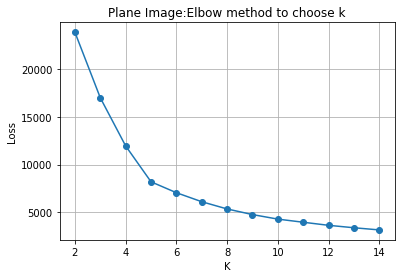

In [0]:
find_optimal_k(normalized_matrix_plane,'Plane')

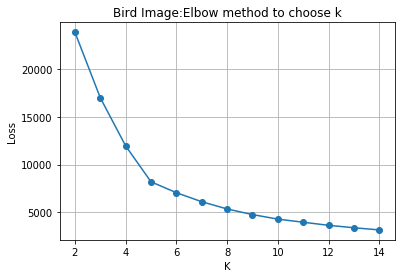

In [0]:
find_optimal_k(normalized_matrix_bird,'Bird')

### `Observation:`
**The optimal value for each of the images seems to be around the knee value which is at k=5**